<a href="https://colab.research.google.com/github/Tag20/Real-Images-vs-AI-generated-Images/blob/main/AIvsRealClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cifake-real-and-ai-generated-synthetic-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3041726%2F5256696%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240326%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240326T162025Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D678350b4788ce5458589ee17a617adc203439f25e018a6d677f9e40117605192ce6ef384f4b4ffe006e9f9d48caf705bd3fc50ea94d6ebc08265ed5a7ca289bd7d029b888c31a949a7ba084dd673543be95ce0ceb94534f17da5d9862fa0884c00209fba3aa5b851cccd07090ef87b073f03f37e82bc93e380f93145a2643cdd8726f6892708a0f48b3e7e9663d176fa1c6e961c9569de2b8502ac8f88a6769a98a1d815c270b7f17188e392fa2014407380ff0059c505d49488764c2f8a79933829a7a3a0f9864fb95cf61f57b220a9d63efdac21d86f337ba6ed474931b215d08850132d0591de6c3ce40c310f268ea20a4f7fa71affb7a1e066cd80288d10,ai-generated-images-vs-real-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4423404%2F7598969%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240326%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240326T162025Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2c16879939dd54c1282557241b755fa719912fe2a5179d19b7bcefa2fce0c7eca53d74c060ce42b82ce5dea96361dffda4cfdd784955af98422816b44a6c4c42b4a1cc2a6e05603272c20c20f057fb0addd0d37947501f533020a044aaa5b79734902096fdc2d2741429ff3f45e0729b8b2eff5f80aea73030c1511f595d7fb95f4037fc3a24b7154b82b0943c3e050994df92966df1ad1a02dab607e8e501c7533d0a40080f2a36dcbd04a48ce6ed22ac1d03952c4e7e1ee736bb998e762d0599adc17981d08bb6e0fc0a0eefef4e12c48ea8b302a98996212ef657e8b63de2faa04c3e8bf37b26c3e3a11734bac57fd2b340c34f9a3ff0a19bb9dd60b78313'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 109625224 bytes downloaded
Downloaded and uncompressed: cifake-real-and-ai-generated-synthetic-images
[==================================================] 499048119 bytes downloaded
Downloaded and uncompressed: ai-generated-images-vs-real-images
Data source import complete.


In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_folder_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/'
test_folder_path = '/kaggle/input/ai-generated-images-vs-real-images/'

In [4]:
train_path = train_folder_path  +'train/'
val_path = train_folder_path + 'test/'

In [5]:
BATCH_SIZE = 32
IMG_SIZE = (32, 32)

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_path,
                                             shuffle=True,
                                             seed = 123,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             label_mode='binary')

Found 100000 files belonging to 2 classes.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(val_path,
                                                                 shuffle=True,
                                                                 seed = 123,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='binary')

Found 20000 files belonging to 2 classes.


In [8]:
class_names = train_dataset.class_names

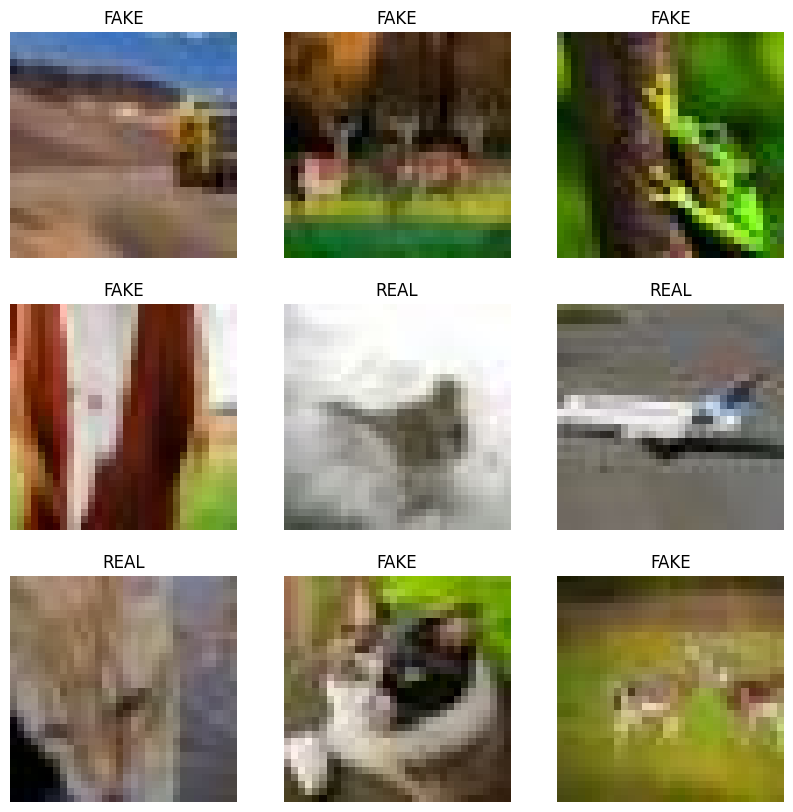

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Access the binary label directly
        label = labels[i].numpy()

        # Display the label
        plt.title("REAL" if label == 1 else "FAKE")
        plt.axis("off")

In [10]:
class_names = os.listdir(train_path)

In [11]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [12]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 500
Number of test batches: 125


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [14]:
def F1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:

layers = []
layers.append(tf.keras.layers.Rescaling(1./255)) # Normalise pixel values
# First Convolutional Layer

layers.append(tf.keras.layers.Conv2D(32, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Dropout(0.25))

# Second Convolutional Layer
layers.append(tf.keras.layers.Conv2D(64, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Dropout(0.25))

# Third Convolutional Layer
layers.append(tf.keras.layers.Conv2D(128, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Dropout(0.25))

layers.append(tf.keras.layers.Flatten())

# ANN
layers.append(tf.keras.layers.Dense(64, activation='relu'))
layers.append(Dropout(rate=.4, seed=123))
# layers.append(tf.keras.layers.Dense(32, activation ='relu'))
layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile model
model = tf.keras.Sequential(layers)
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Build the model so we can see a summary
model.build(input_shape=(None, 32, 32, 3))


In [16]:
# img_shape=(32, 32, 3)
# base_model=tf.keras.applications.EfficientNetV2B0(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')
# base_model.trainable=False
# x=base_model.output
# x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
# x = Dense(256, kernel_regularizer = regularizers.l2(l2 = 0.016),activity_regularizer=regularizers.l1(0.006),
#                 bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
# x=Dropout(rate=.4, seed=123)(x)
# output=Dense(2, activation='softmax')(x)
# model=Model(inputs=base_model.input, outputs=output)
# model.compile(Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy', F1_score])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [18]:
es = EarlyStopping(
    monitor='val_accuracy',
    verbose=1, patience=3, mode='auto'
)
# mc = ModelCheckpoint(
#     filepath='/content',
#     monitor='val_accuracy',
#     verbose=1, save_best_only=True
# )
lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    verbose=1, patience=2, min_lr=0.001
)

In [19]:
model.fit(train_dataset,
                  epochs=10,
                  callbacks=[es, lr],
                  validation_data=validation_dataset,
#                   steps_per_epoch=200,
#                   validation_steps=200,
                 )

Epoch 1/10
3125/3125 [==============================] - 102s 32ms/step - loss: 0.3780 - accuracy: 0.8323 - precision: 0.8324 - recall: 0.8322 - val_loss: 0.2640 - val_accuracy: 0.8924 - val_precision: 0.9128 - val_recall: 0.8674 - lr: 0.0010
Epoch 2/10
3125/3125 [==============================] - 95s 30ms/step - loss: 0.2758 - accuracy: 0.8878 - precision: 0.8915 - recall: 0.8831 - val_loss: 0.2286 - val_accuracy: 0.9096 - val_precision: 0.8968 - val_recall: 0.9252 - lr: 0.0010
Epoch 3/10
3125/3125 [==============================] - 95s 30ms/step - loss: 0.2528 - accuracy: 0.8988 - precision: 0.8997 - recall: 0.8977 - val_loss: 0.2153 - val_accuracy: 0.9148 - val_precision: 0.9201 - val_recall: 0.9082 - lr: 0.0010
Epoch 4/10
3125/3125 [==============================] - 104s 33ms/step - loss: 0.2376 - accuracy: 0.9051 - precision: 0.9065 - recall: 0.9033 - val_loss: 0.2148 - val_accuracy: 0.9127 - val_precision: 0.9205 - val_recall: 0.9031 - lr: 0.0010
Epoch 5/10
3125/3125 [============

Text(0.5, 1.0, 'loss')

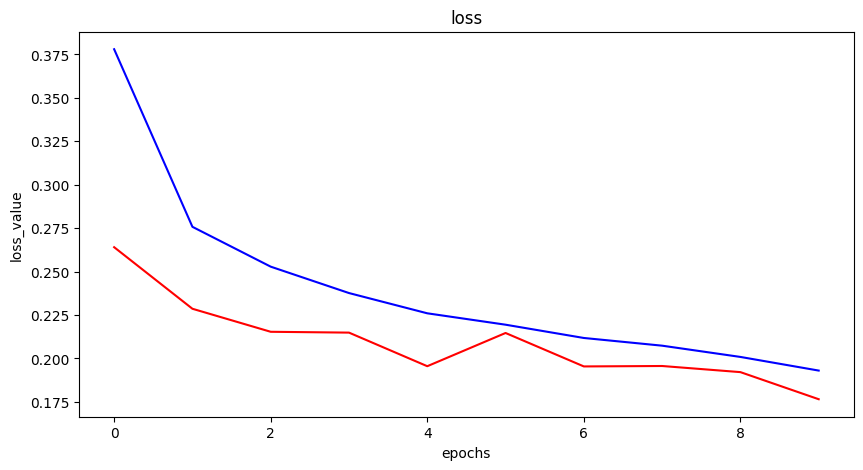

In [20]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history['loss'], color='b', label='Training loss')
plt.plot(model.history.history['val_loss'], color='r', label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss_value")
plt.title("loss")

Text(0.5, 1.0, 'accuracy graph')

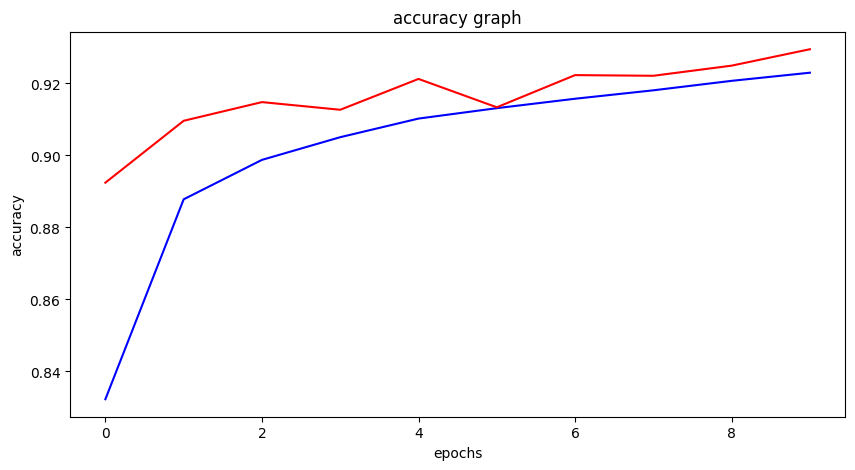

In [21]:
plt.figure(figsize=(10,5))
plt.plot(model.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',label='Validation accsuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy graph")

### Testing on test data

In [26]:
loss,accuracy,precision, recall = model.evaluate(test_dataset)
print(f'Test accuracy :{accuracy} \n loss:{loss} \n precision: {precision} \n recall:{recall}')

125/125 [==============================] - 1s 10ms/step - loss: 0.1729 - accuracy: 0.9305 - precision: 0.9287 - recall: 0.9343
Test accuracy :0.9304999709129333 
 loss:0.17286618053913116 
 precision: 0.9287469387054443 
 recall:0.9342560768127441


### Loading images with prediciton label

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


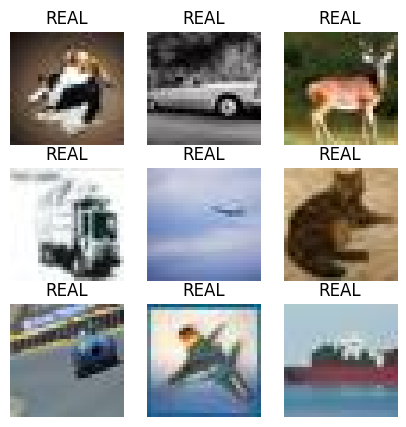

In [27]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(5, 5))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")